In [18]:
# EDA
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import plotly.figure_factory as ff
import plotly.express as px
import sweetviz as sv

# ML
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, recall_score

# Optimization Hyperparameter
import optuna

In [19]:
# Carregar dataset
df_obesidade = pd.read_csv('datasets/dataset_obesidade.csv')

In [20]:
# Mostrar os primeiros registros do df
df_obesidade.head()

,Genero_Masculino,Idade,Historico_Familiar_Sobrepeso,Consumo_Alta_Caloria_Com_Frequencia,Consumo_Vegetais_Com_Frequencia,Refeicoes_Dia,Consumo_Alimentos_entre_Refeicoes,Fumante,Consumo_Agua,Monitora_Calorias_Ingeridas,Nivel_Atividade_Fisica,Nivel_Uso_Tela,Consumo_Alcool,Transporte_Automovel,Transporte_Bicicleta,Transporte_Motocicleta,Transporte_Publico,Transporte_Caminhada,Obesidade
0,0,21.0,1,0,2.0,3.0,1,0,2.0,0,0.0,1.0,0,0,0,0,1,0,0
1,0,21.0,1,0,3.0,3.0,1,1,3.0,1,3.0,0.0,1,0,0,0,1,0,0
2,1,23.0,1,0,2.0,3.0,1,0,2.0,0,2.0,1.0,2,0,0,0,1,0,0
3,1,27.0,0,0,3.0,3.0,1,0,2.0,0,2.0,0.0,2,0,0,0,0,1,0
4,1,22.0,0,0,2.0,1.0,1,0,2.0,0,0.0,0.0,1,0,0,0,1,0,0


In [21]:
# Mostrar os últimos registros do df
df_obesidade.tail()

,Genero_Masculino,Idade,Historico_Familiar_Sobrepeso,Consumo_Alta_Caloria_Com_Frequencia,Consumo_Vegetais_Com_Frequencia,Refeicoes_Dia,Consumo_Alimentos_entre_Refeicoes,Fumante,Consumo_Agua,Monitora_Calorias_Ingeridas,Nivel_Atividade_Fisica,Nivel_Uso_Tela,Consumo_Alcool,Transporte_Automovel,Transporte_Bicicleta,Transporte_Motocicleta,Transporte_Publico,Transporte_Caminhada,Obesidade
2106,0,20.976842,1,1,3.0,3.0,1,0,1.728139,0,1.676269,0.906247,1,0,0,0,1,0,1
2107,0,21.982942,1,1,3.0,3.0,1,0,2.005130,0,1.341390,0.599270,1,0,0,0,1,0,1
2108,0,22.524036,1,1,3.0,3.0,1,0,2.054193,0,1.414209,0.646288,1,0,0,0,1,0,1
2109,0,24.361936,1,1,3.0,3.0,1,0,2.852339,0,1.139107,0.586035,1,0,0,0,1,0,1
2110,0,23.664709,1,1,3.0,3.0,1,0,2.863513,0,1.026452,0.714137,1,0,0,0,1,0,1


In [22]:
# Mostrar estrutura / schema do df
df_obesidade.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 19 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Genero_Masculino                     2111 non-null   int64  
 1   Idade                                2111 non-null   float64
 2   Historico_Familiar_Sobrepeso         2111 non-null   int64  
 3   Consumo_Alta_Caloria_Com_Frequencia  2111 non-null   int64  
 4   Consumo_Vegetais_Com_Frequencia      2111 non-null   float64
 5   Refeicoes_Dia                        2111 non-null   float64
 6   Consumo_Alimentos_entre_Refeicoes    2111 non-null   int64  
 7   Fumante                              2111 non-null   int64  
 8   Consumo_Agua                         2111 non-null   float64
 9   Monitora_Calorias_Ingeridas          2111 non-null   int64  
 10  Nivel_Atividade_Fisica               2111 non-null   float64
 11  Nivel_Uso_Tela                

In [23]:
# Converter variáveis do tipo float para int
colunas_tipo_float = ["Idade", "Consumo_Vegetais_Com_Frequencia", "Refeicoes_Dia", "Consumo_Agua", "Nivel_Atividade_Fisica", "Nivel_Uso_Tela"]
df_obesidade[colunas_tipo_float] = df_obesidade[colunas_tipo_float].astype(int)
df_obesidade.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 19 columns):
 #   Column                               Non-Null Count  Dtype
---  ------                               --------------  -----
 0   Genero_Masculino                     2111 non-null   int64
 1   Idade                                2111 non-null   int64
 2   Historico_Familiar_Sobrepeso         2111 non-null   int64
 3   Consumo_Alta_Caloria_Com_Frequencia  2111 non-null   int64
 4   Consumo_Vegetais_Com_Frequencia      2111 non-null   int64
 5   Refeicoes_Dia                        2111 non-null   int64
 6   Consumo_Alimentos_entre_Refeicoes    2111 non-null   int64
 7   Fumante                              2111 non-null   int64
 8   Consumo_Agua                         2111 non-null   int64
 9   Monitora_Calorias_Ingeridas          2111 non-null   int64
 10  Nivel_Atividade_Fisica               2111 non-null   int64
 11  Nivel_Uso_Tela                       2111 non-null   int

In [24]:
# Detectar se tem valores ausentes
df_obesidade.isnull().sum()

Genero_Masculino                       0
Idade                                  0
Historico_Familiar_Sobrepeso           0
Consumo_Alta_Caloria_Com_Frequencia    0
Consumo_Vegetais_Com_Frequencia        0
Refeicoes_Dia                          0
Consumo_Alimentos_entre_Refeicoes      0
Fumante                                0
Consumo_Agua                           0
Monitora_Calorias_Ingeridas            0
Nivel_Atividade_Fisica                 0
Nivel_Uso_Tela                         0
Consumo_Alcool                         0
Transporte_Automovel                   0
Transporte_Bicicleta                   0
Transporte_Motocicleta                 0
Transporte_Publico                     0
Transporte_Caminhada                   0
Obesidade                              0
dtype: int64

# EDA

In [25]:
# Distribuição de variável target (Obesidade)
px.bar(df_obesidade.value_counts('Obesidade'))

In [36]:
# Distribuição de variável target (Obesidade) - Percentual
px.bar(df_obesidade.value_counts('Obesidade') / df_obesidade.shape[0] * 100)

In [37]:
# Análise Univariada
px.histogram(df_obesidade, x="Idade")

In [38]:
# Análise Univariada - Idade
px.box(df_obesidade, y="Idade")

In [40]:
# Análise Univariada - Genero
px.bar(df_obesidade.value_counts('Genero_Masculino') / df_obesidade.shape[0] * 100)

In [41]:
# Análise Univariada - Historico_Familiar_Sobrepeso
px.bar(df_obesidade.value_counts('Historico_Familiar_Sobrepeso') / df_obesidade.shape[0] * 100)

In [42]:
# Análise Univariada - Nivel_Atividade_Fisica
px.bar(df_obesidade.value_counts('Nivel_Atividade_Fisica') / df_obesidade.shape[0] * 100)

In [43]:
# Análise Univariada - Nivel_Uso_Tela
px.bar(df_obesidade.value_counts('Nivel_Uso_Tela') / df_obesidade.shape[0] * 100)

In [44]:
# Formulação de Hipóteses
# Faixa etária influencia em obesidade
df_obesidade['Idade'].describe()

count    2111.000000
mean       23.972525
std         6.308664
min        14.000000
25%        19.000000
50%        22.000000
75%        26.000000
max        61.000000
Name: Idade, dtype: float64

In [53]:
# Bucketing de Idade
bins = [10, 20, 30, 40, 50, 60, 70]
bins_ordinal = [0, 1, 2, 3, 4, 5]
labels = ['10-20', '20-30', '30-40', '40-50', '50-60', '60-70']
df_obesidade['Idade_Bucket_String'] = pd.cut(df_obesidade['Idade'], bins=bins, labels=labels, include_lowest=True)
df_obesidade['Idade_Bucket_Ordinal'] = pd.cut(df_obesidade['Idade'], bins=bins, labels=bins_ordinal, include_lowest=True)

In [54]:
df_obesidade

,Genero_Masculino,Idade,Historico_Familiar_Sobrepeso,Consumo_Alta_Caloria_Com_Frequencia,Consumo_Vegetais_Com_Frequencia,Refeicoes_Dia,Consumo_Alimentos_entre_Refeicoes,Fumante,Consumo_Agua,Monitora_Calorias_Ingeridas,...,Consumo_Alcool,Transporte_Automovel,Transporte_Bicicleta,Transporte_Motocicleta,Transporte_Publico,Transporte_Caminhada,Obesidade,Idade_Bucket,Idade_Bucket_Ordinal,Idade_Bucket_String
0,0,21,1,0,2,3,1,0,2,0,...,0,0,0,0,1,0,0,20-30,1,20-30
1,0,21,1,0,3,3,1,1,3,1,...,1,0,0,0,1,0,0,20-30,1,20-30
2,1,23,1,0,2,3,1,0,2,0,...,2,0,0,0,1,0,0,20-30,1,20-30
3,1,27,0,0,3,3,1,0,2,0,...,2,0,0,0,0,1,0,20-30,1,20-30
4,1,22,0,0,2,1,1,0,2,0,...,1,0,0,0,1,0,0,20-30,1,20-30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,0,20,1,1,3,3,1,0,1,0,...,1,0,0,0,1,0,1,10-20,0,10-20
2107,0,21,1,1,3,3,1,0,2,0,...,1,0,0,0,1,0,1,20-30,1,20-30
2108,0,22,1,1,3,3,1,0,2,0,...,1,0,0,0,1,0,1,20-30,1,20-30
2109,0,24,1,1,3,3,1,0,2,0,...,1,0,0,0,1,0,1,20-30,1,20-30


In [56]:
# Criar tabela de contigência - Faixa Etária e Obesidade
tabela_contigencia_idade_obesidade = sm.stats.Table.from_data(df_obesidade[['Obesidade', 'Idade_Bucket_String']])
tabela_contigencia_idade_obesidade.table_orig

Idade_Bucket_String,10-20,20-30,30-40,40-50,50-60,60-70
Obesidade,,,,,,
0,498,489,131,13,7,1
1,176,649,127,19,1,0


In [58]:
# Teste de Chi-Square de Pearson
chi2_test_idade_obesidade = tabela_contigencia_idade_obesidade.test_nominal_association()
print(chi2_test_idade_obesidade)

df          5
pvalue      0.0
statistic   170.1116865347508


Como p-valor é menor que 0.05 então rejeitamos a hipótese nula e aceitamos a hipótese alternativa. Portanto, as variáveis são correlacionadas.

                                             |          | [  0%]   00:00 -> (? left)


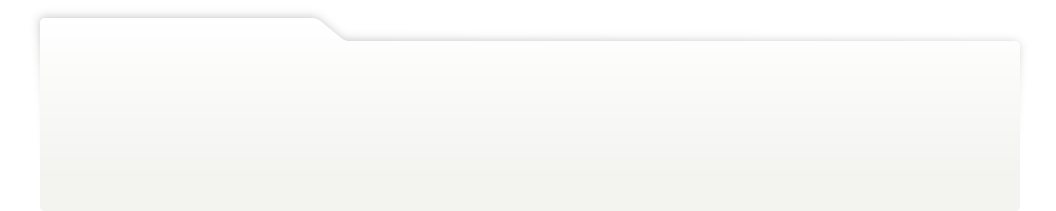
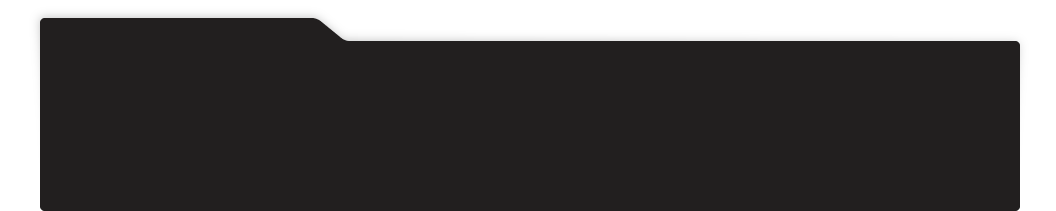
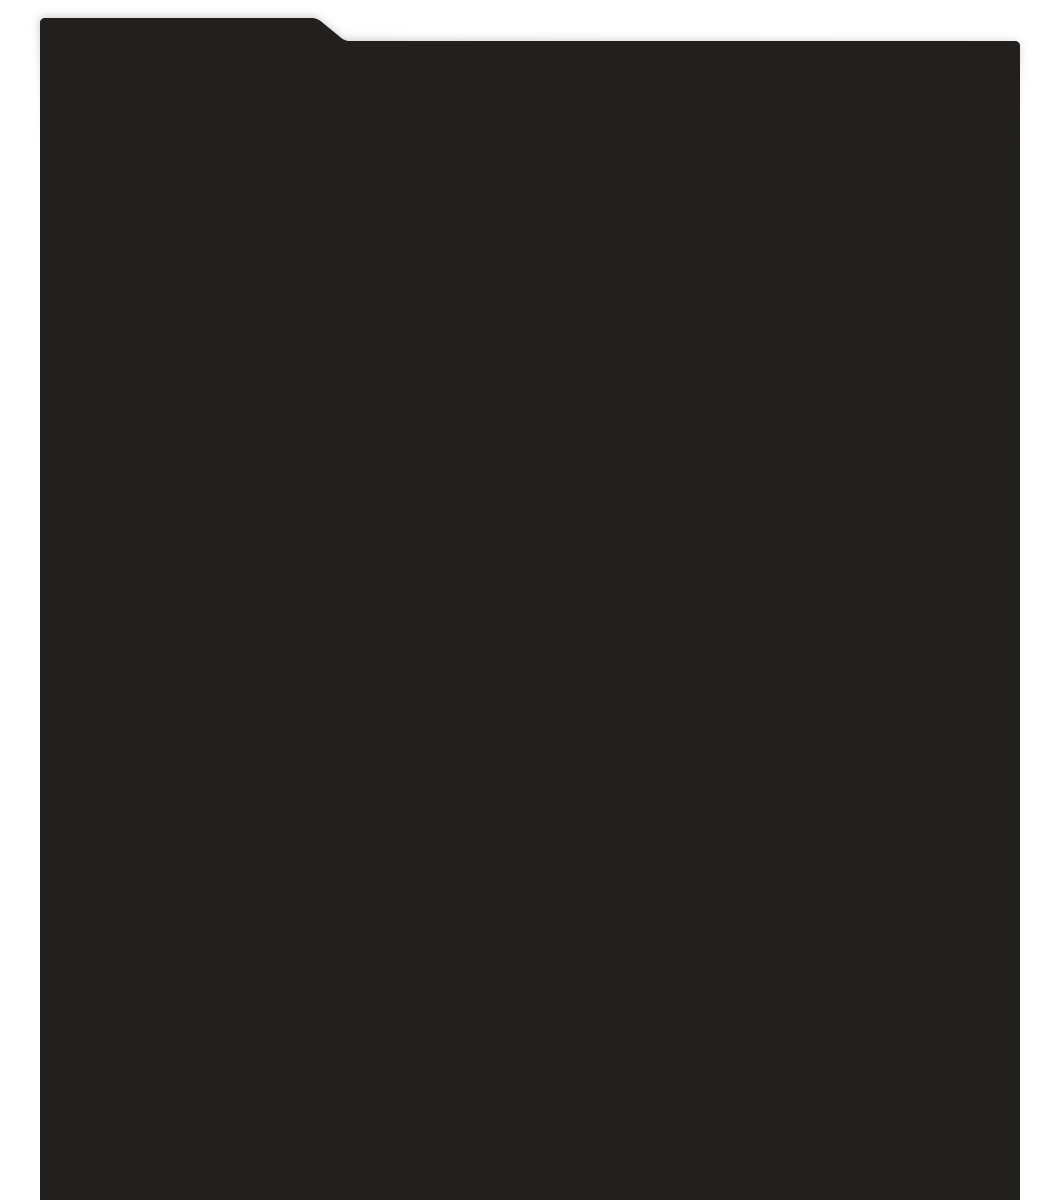
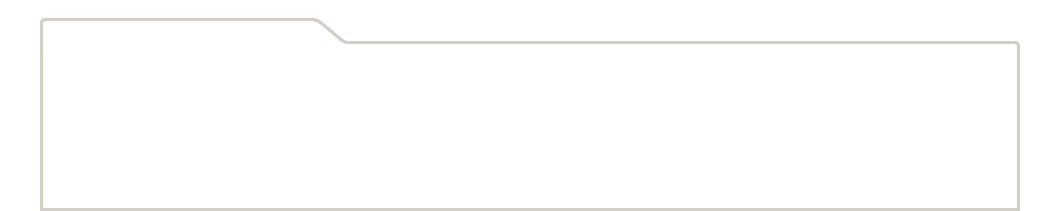
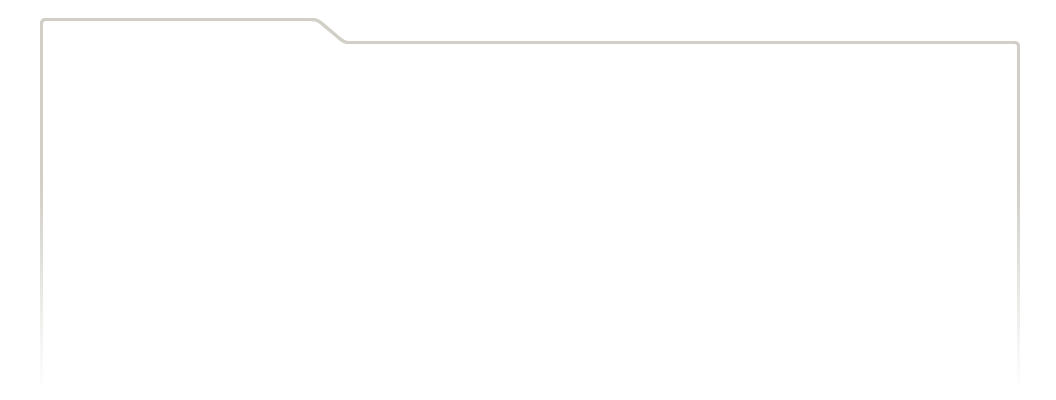
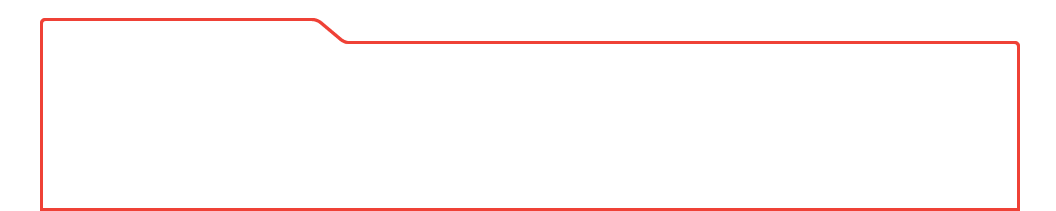
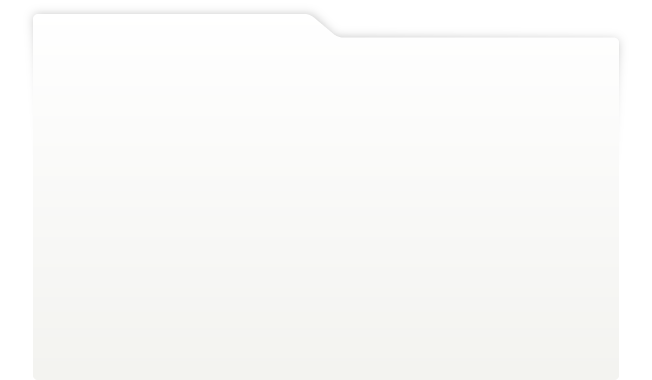
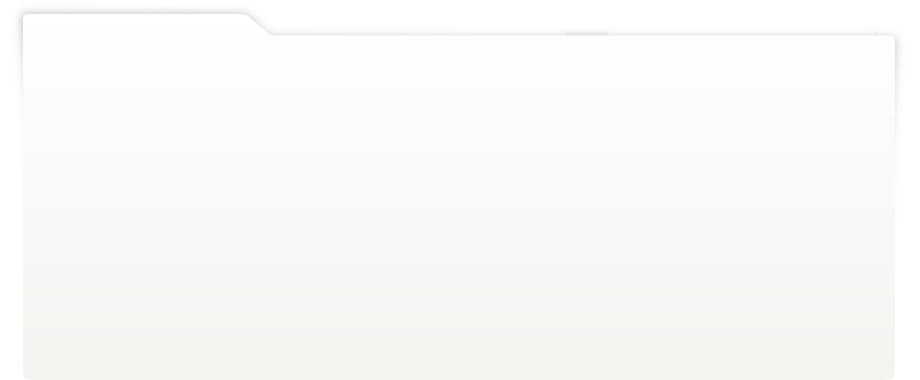
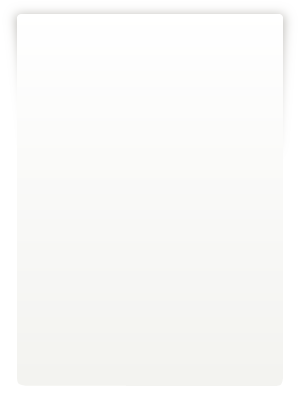
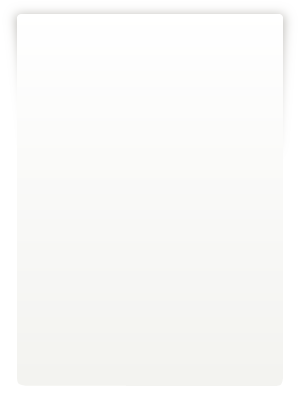
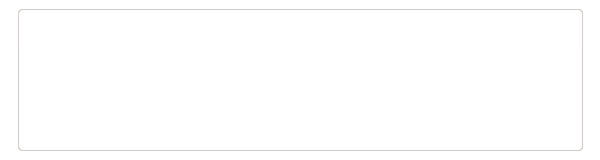
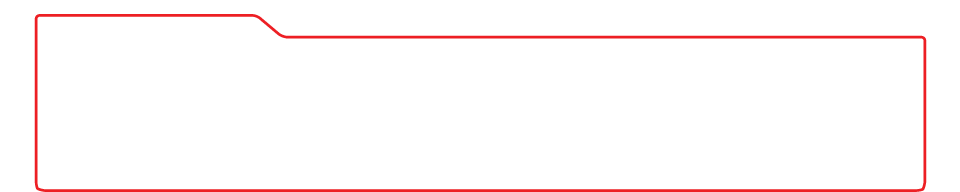
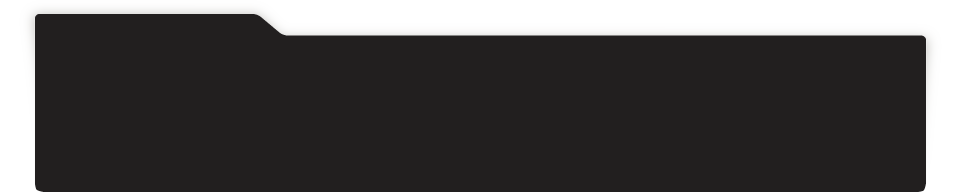
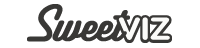
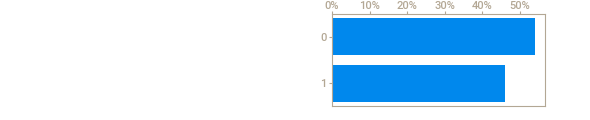
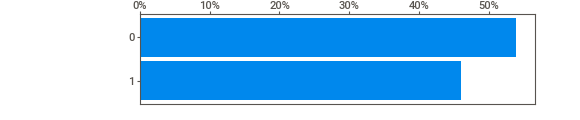
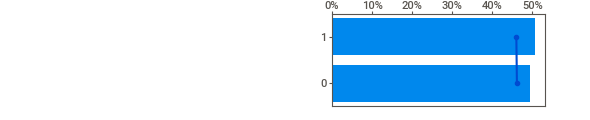
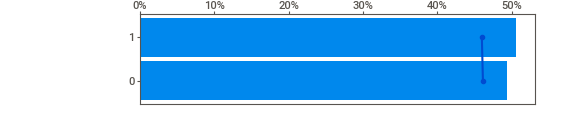
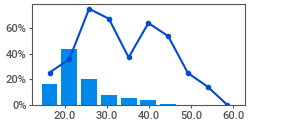
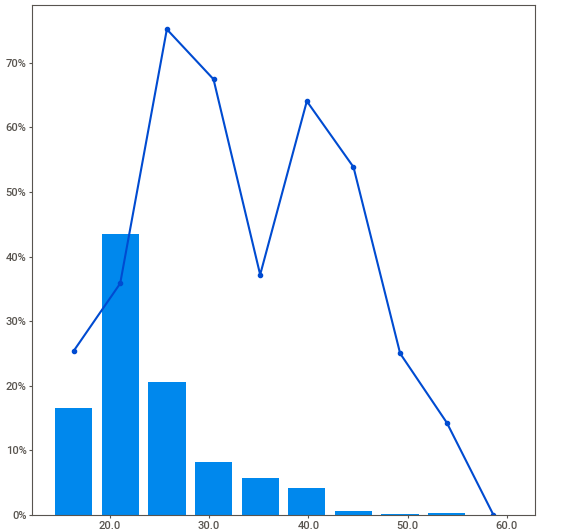
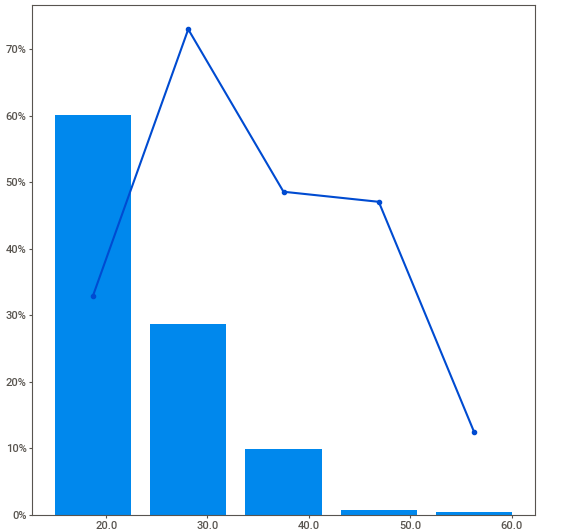
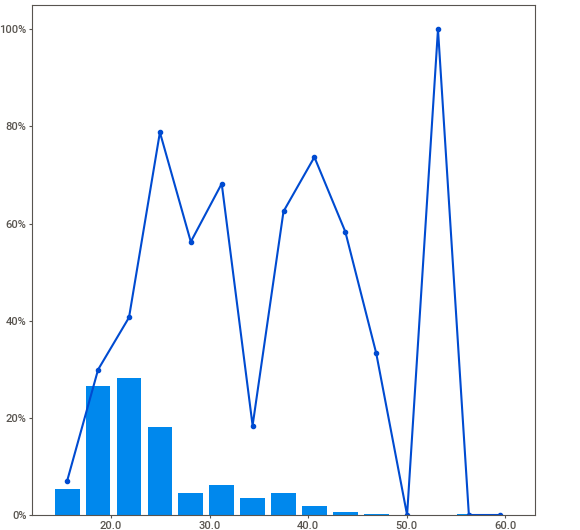
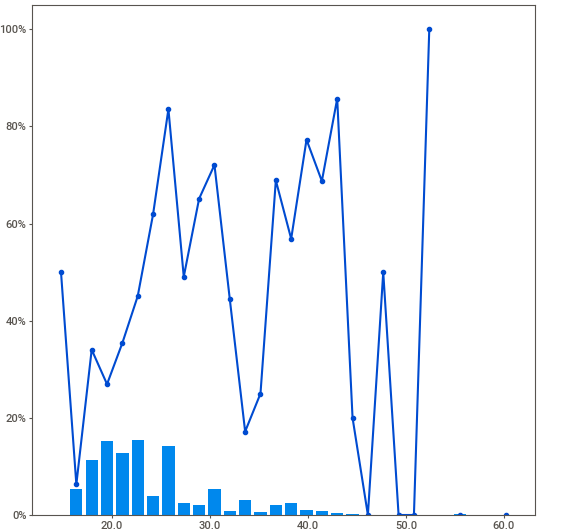
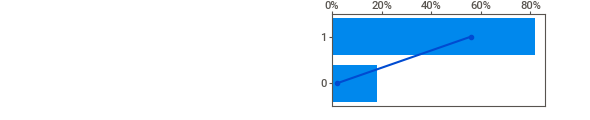
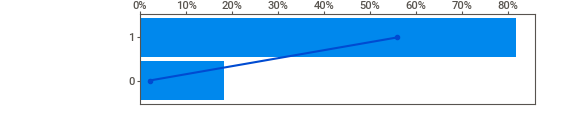
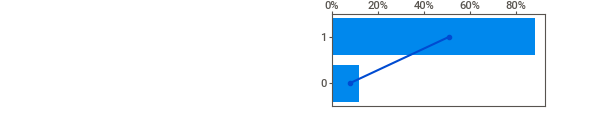
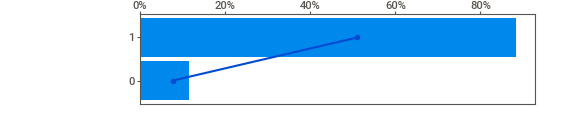
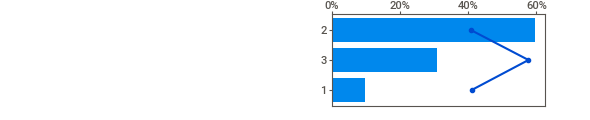
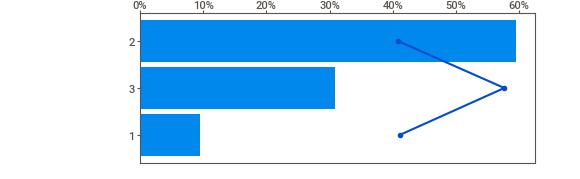
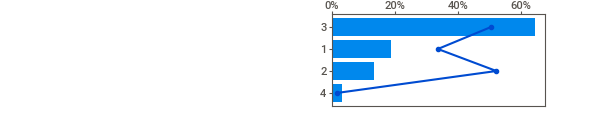
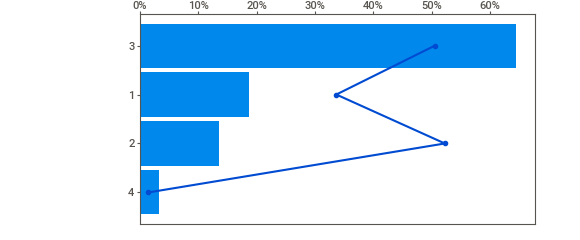
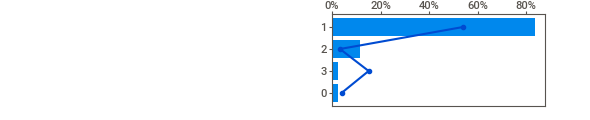
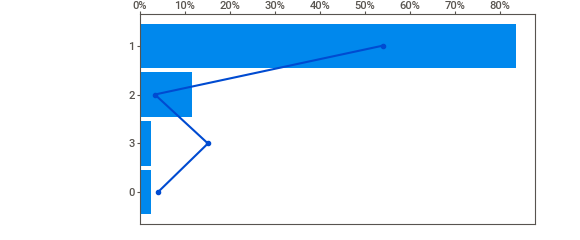
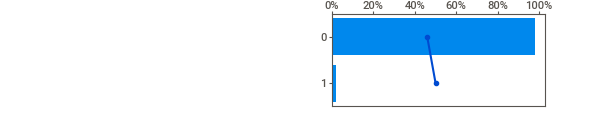
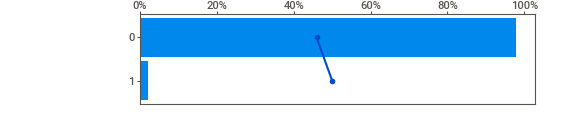
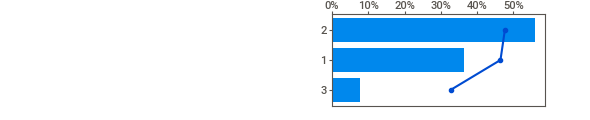
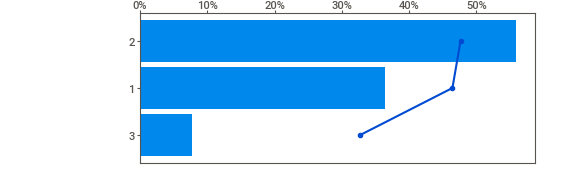
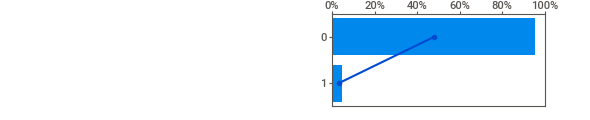
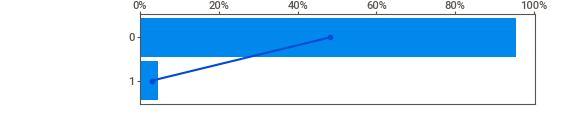
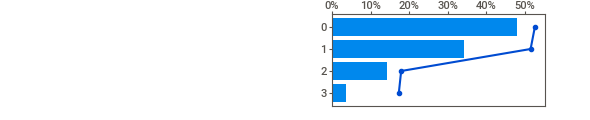
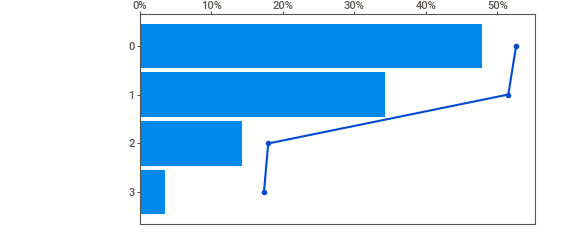
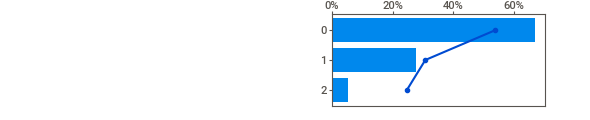
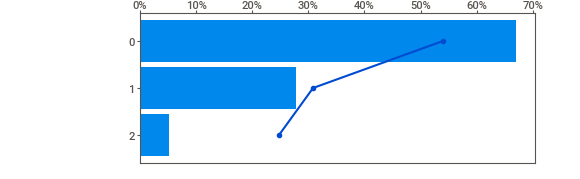
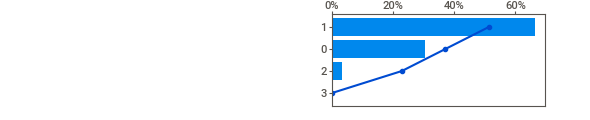
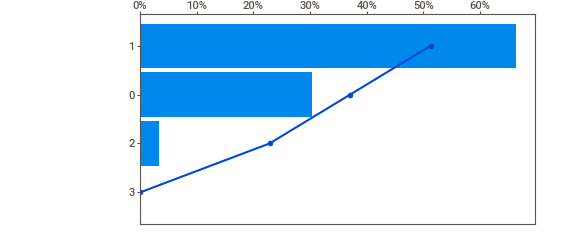
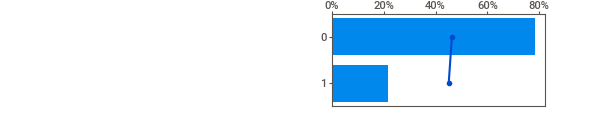
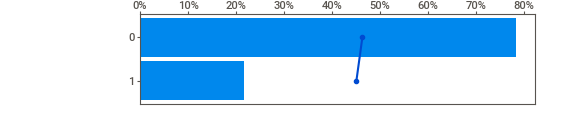
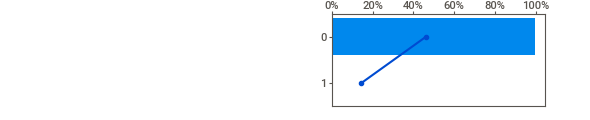
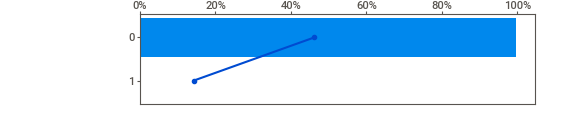
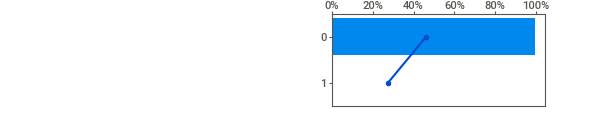
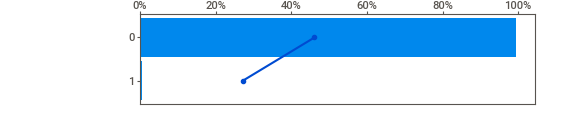
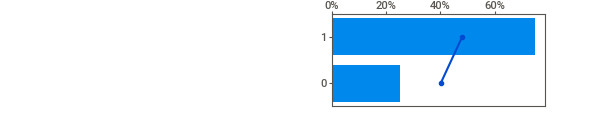
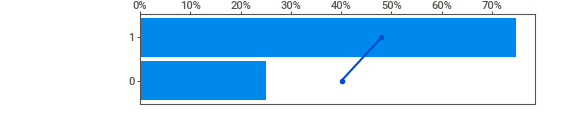
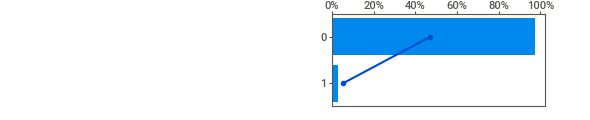
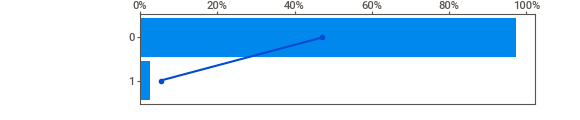
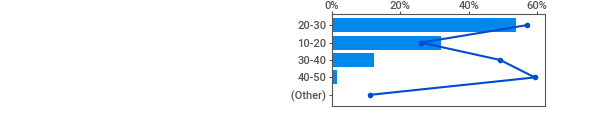
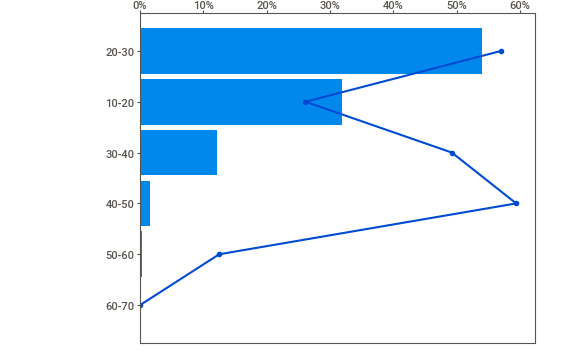
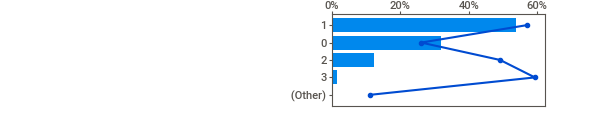
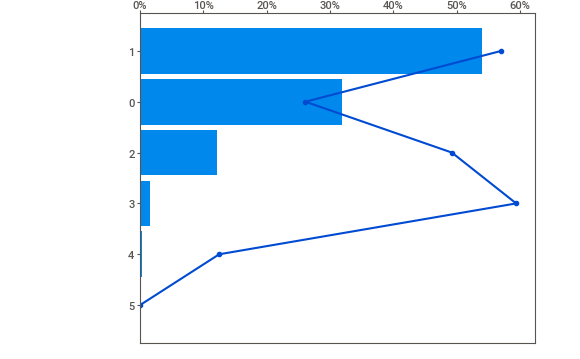
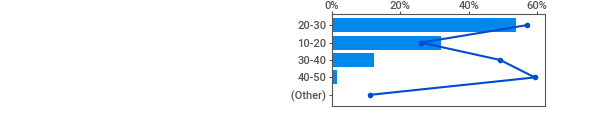
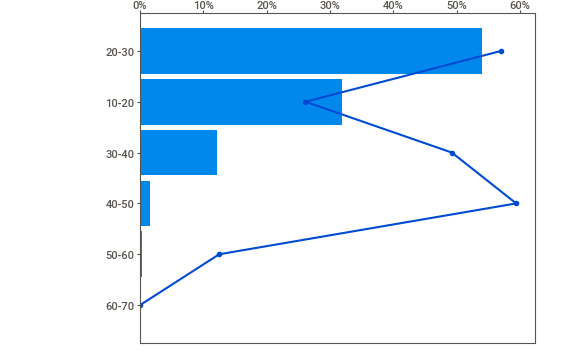
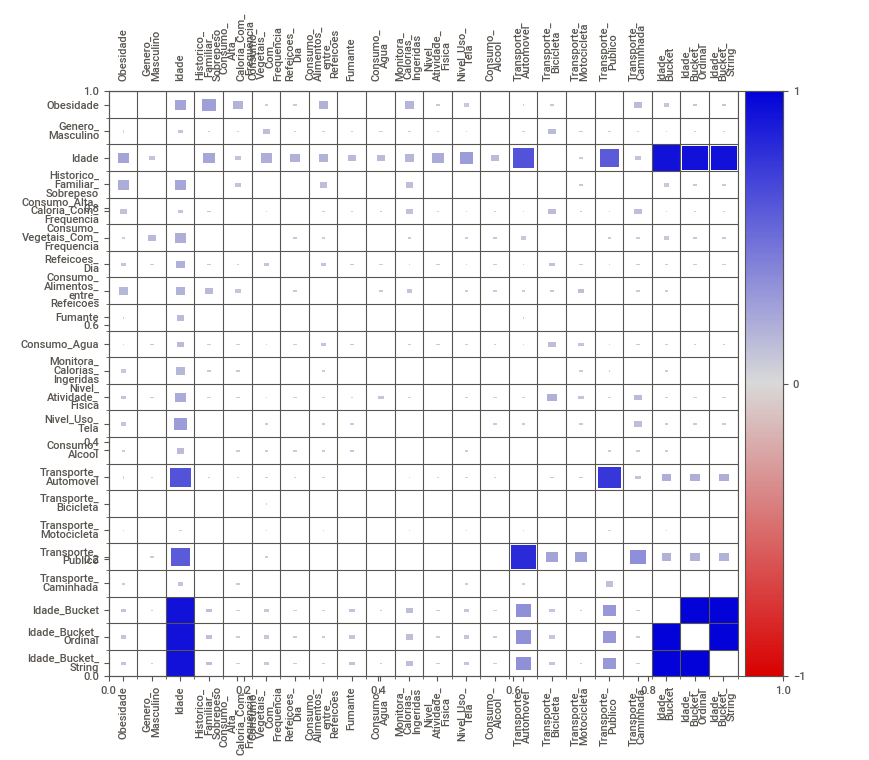
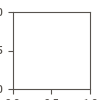

In [60]:
# Automatizar EDA
sv_obesidade_report = sv.analyze(df_obesidade, target_feat='Obesidade')

# Mostrar o relatório
sv_obesidade_report.show_notebook()